In [69]:
import pandas as pd 
import numpy as np 
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE




In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Downloads\archive\Subscription_Dataset.csv')
df.set_index('CustomerID', inplace=True)
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,
LOHRYYC9E8,42,11.321950,475.521914,Basic,Electronic check,Yes,Movies,Yes,Tablet,0.386852,24.593361,25,Comedy,3.489465,7,Female,15,No,No,0
RIH7RFEZCS,95,12.810915,1217.036887,Standard,Electronic check,Yes,TV Shows,No,Mobile,37.123000,102.860795,21,Comedy,2.251860,3,Male,8,No,NaN,0
JB5J8X2UY1,6,NaN,91.583304,Standard,Credit card,Yes,TV Shows,No,Tablet,30.716944,10.512415,29,Fantasy,NaN,4,Male,14,No,Yes,1
Z4GZJIB90P,54,17.917819,967.562224,Basic,NaN,Yes,Movies,No,Mobile,2.495373,45.246834,45,Drama,1.275004,3,Male,12,No,NaN,0
B3BDJTW0L9,27,NaN,339.057244,Basic,Mailed check,No,TV Shows,No,Mobile,39.936910,94.310954,44,Comedy,3.236230,4,Female,18,No,NaN,0


## 1. EDA - Limpieza y transformación de los datos

In [3]:
#Revisión de la estructura del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, LOHRYYC9E8 to WN959MJRVK
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                963 non-null    int64  
 1   MonthlyCharges            759 non-null    float64
 2   TotalCharges              777 non-null    float64
 3   SubscriptionType          913 non-null    object 
 4   PaymentMethod             740 non-null    object 
 5   PaperlessBilling          963 non-null    object 
 6   ContentType               963 non-null    object 
 7   MultiDeviceAccess         963 non-null    object 
 8   DeviceRegistered          887 non-null    object 
 9   ViewingHoursPerWeek       963 non-null    float64
 10  AverageViewingDuration    963 non-null    float64
 11  ContentDownloadsPerMonth  963 non-null    int64  
 12  GenrePreference           853 non-null    object 
 13  UserRating                702 non-null    float64
 14 

In [4]:
#Evaluación de los valores nulos por columna
df.isnull().sum()   

AccountAge                    0
MonthlyCharges              204
TotalCharges                186
SubscriptionType             50
PaymentMethod               223
PaperlessBilling              0
ContentType                   0
MultiDeviceAccess             0
DeviceRegistered             76
ViewingHoursPerWeek           0
AverageViewingDuration        0
ContentDownloadsPerMonth      0
GenrePreference             110
UserRating                  261
SupportTicketsPerMonth        0
Gender                       40
WatchlistSize                 0
ParentalControl               0
SubtitlesEnabled            800
Churn                         0
dtype: int64

### Evaluación de faltantes y nulos

In [5]:
#Evaluación en % de los faltantes por columna
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

MonthlyCharges      21.183801
TotalCharges        19.314642
SubscriptionType     5.192108
PaymentMethod       23.156802
DeviceRegistered     7.892004
GenrePreference     11.422638
UserRating          27.102804
Gender               4.153686
SubtitlesEnabled    83.073728
dtype: float64

In [67]:
#Revisión de los valores posibles en la columna SubscriptionType
df['Churn'].value_counts()

Churn
0    794
1    169
Name: count, dtype: int64

In [6]:
#Revisión de los valores posibles en la columna SubscriptionType
df['SubscriptionType'].value_counts()

SubscriptionType
Premium     333
Basic       293
Standard    287
Name: count, dtype: int64

In [7]:
#Revisión de los valores posibles en la columna PaymentMethod
df['PaymentMethod'].value_counts()

PaymentMethod
Credit card         245
Electronic check    214
Bank transfer       214
Mailed check         67
Name: count, dtype: int64

In [8]:
#Revisión de los valores posibles en la columna DeviceRegistered
df["DeviceRegistered"].value_counts()

DeviceRegistered
Mobile      278
Computer    251
TV          251
Tablet      107
Name: count, dtype: int64

In [9]:
#Revisión de los valores posibles en la columna Gender
df["Gender"].value_counts()

Gender
Male      541
Female    382
Name: count, dtype: int64

In [10]:
#Revisión de los valores posibles en la columna GenrePreference
df['GenrePreference'].value_counts()

GenrePreference
Comedy     196
Fantasy    185
Drama      185
Action     178
Sci-Fi     109
Name: count, dtype: int64

In [41]:
#Revisión de los valores posibles en la columna GenrePreference
df['ContentType'].value_counts()

ContentType
Both        349
TV Shows    311
Movies      303
Name: count, dtype: int64

In [11]:
#Revisión decsritiva de la columna MonthlyCharges antes de imputar
df['MonthlyCharges'].describe()

count    759.000000
mean      12.328262
std        4.260861
min        5.062339
25%        8.816669
50%       12.169888
75%       15.937606
max       19.932542
Name: MonthlyCharges, dtype: float64

In [12]:
#Revisión decsritiva de la columna TotalCharges antes de imputar
df['TotalCharges'].describe()

count     777.000000
mean      714.052121
std       511.071322
min        11.582882
25%       318.425396
50%       614.196606
75%      1021.436452
max      2261.019201
Name: TotalCharges, dtype: float64

In [13]:
#Eiminamos la columna SubtitlesEnabled por tener más del 80% de valores faltantes
df.drop(['SubtitlesEnabled'], axis=1, inplace=True)

In [14]:
#Identificación de columnas con un solo valor único
df.nunique()


AccountAge                  119
MonthlyCharges              759
TotalCharges                777
SubscriptionType              3
PaymentMethod                 4
PaperlessBilling              2
ContentType                   3
MultiDeviceAccess             2
DeviceRegistered              4
ViewingHoursPerWeek         963
AverageViewingDuration      963
ContentDownloadsPerMonth     50
GenrePreference               5
UserRating                  702
SupportTicketsPerMonth       10
Gender                        2
WatchlistSize                25
ParentalControl               2
Churn                         2
dtype: int64

In [15]:
# Comprobar duplicados
df.duplicated().sum()

np.int64(0)

### 1.2 Imputación de variables con < 20% de faltantes 

In [16]:
df["SubscriptionType"].mode()

0    Premium
Name: SubscriptionType, dtype: object

##### Comentario: Imputamos estas variables porque sus faltantes no superan el 5%, podríamos imputar sin problema con la moda. La única variable mayoritariamente más desbalanceada es la de género, pero no tendrá ningún impacto significativo sobre el desbalance. 

In [17]:
# Imputación con moda
df["SubscriptionType"] = df["SubscriptionType"].fillna(df["SubscriptionType"].mode()[0])
df["DeviceRegistered"] = df["DeviceRegistered"].fillna(df["DeviceRegistered"].mode()[0])
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

In [18]:
faltantes_2 = df.isna().mean()*100
faltantes_2[faltantes_2>0]

MonthlyCharges     21.183801
TotalCharges       19.314642
PaymentMethod      23.156802
GenrePreference    11.422638
UserRating         27.102804
dtype: float64

<Axes: >

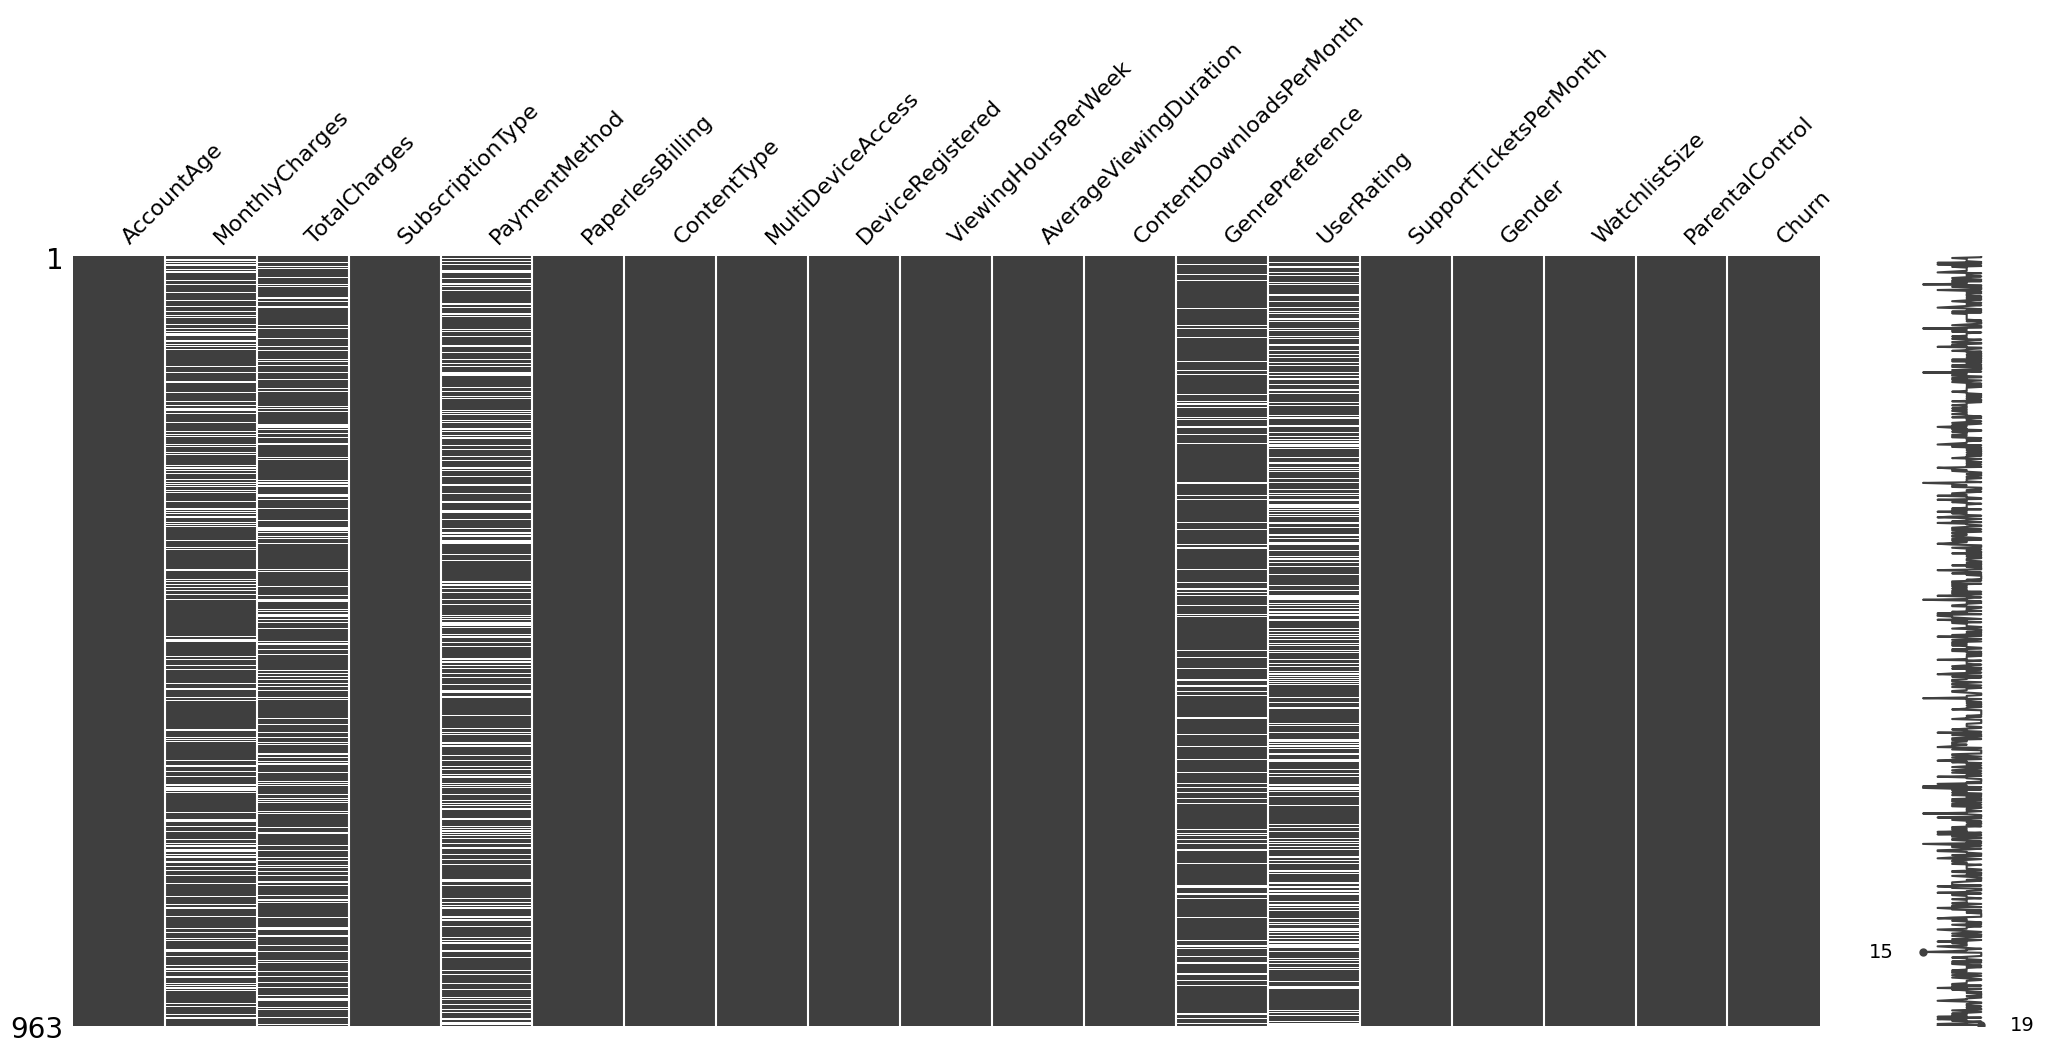

In [19]:
# Visualizamos los valores faltantes como una matriz
msno.matrix(df)

In [20]:
### Eliminaremos la columna de UserRating por la cantidad de faltantes
df.drop(columns=["UserRating"], axis=1, inplace=True)

#### Imputaciones restantes

In [21]:
#Faltantes de menos del 15% en la columna GenrePreference - imputamos por moda
df["GenrePreference"] = df["GenrePreference"].fillna(df["GenrePreference"].mode()[0])

In [22]:
df["GenrePreference"].value_counts()

GenrePreference
Comedy     306
Fantasy    185
Drama      185
Action     178
Sci-Fi     109
Name: count, dtype: int64

In [23]:
#Imputacion por KNN los valores faltantes en las columnas numéricas (además ambas están muy relacionadas)
numerical_cols = ['MonthlyCharges', 'TotalCharges']
imputer_knn = KNNImputer(n_neighbors=5)
df[numerical_cols] = imputer_knn.fit_transform(df[numerical_cols])

In [24]:
df['MonthlyCharges'].describe()

count    963.000000
mean      12.317386
std        3.927830
min        5.062339
25%        9.287640
50%       12.287810
75%       15.330919
max       19.932542
Name: MonthlyCharges, dtype: float64

<Axes: >

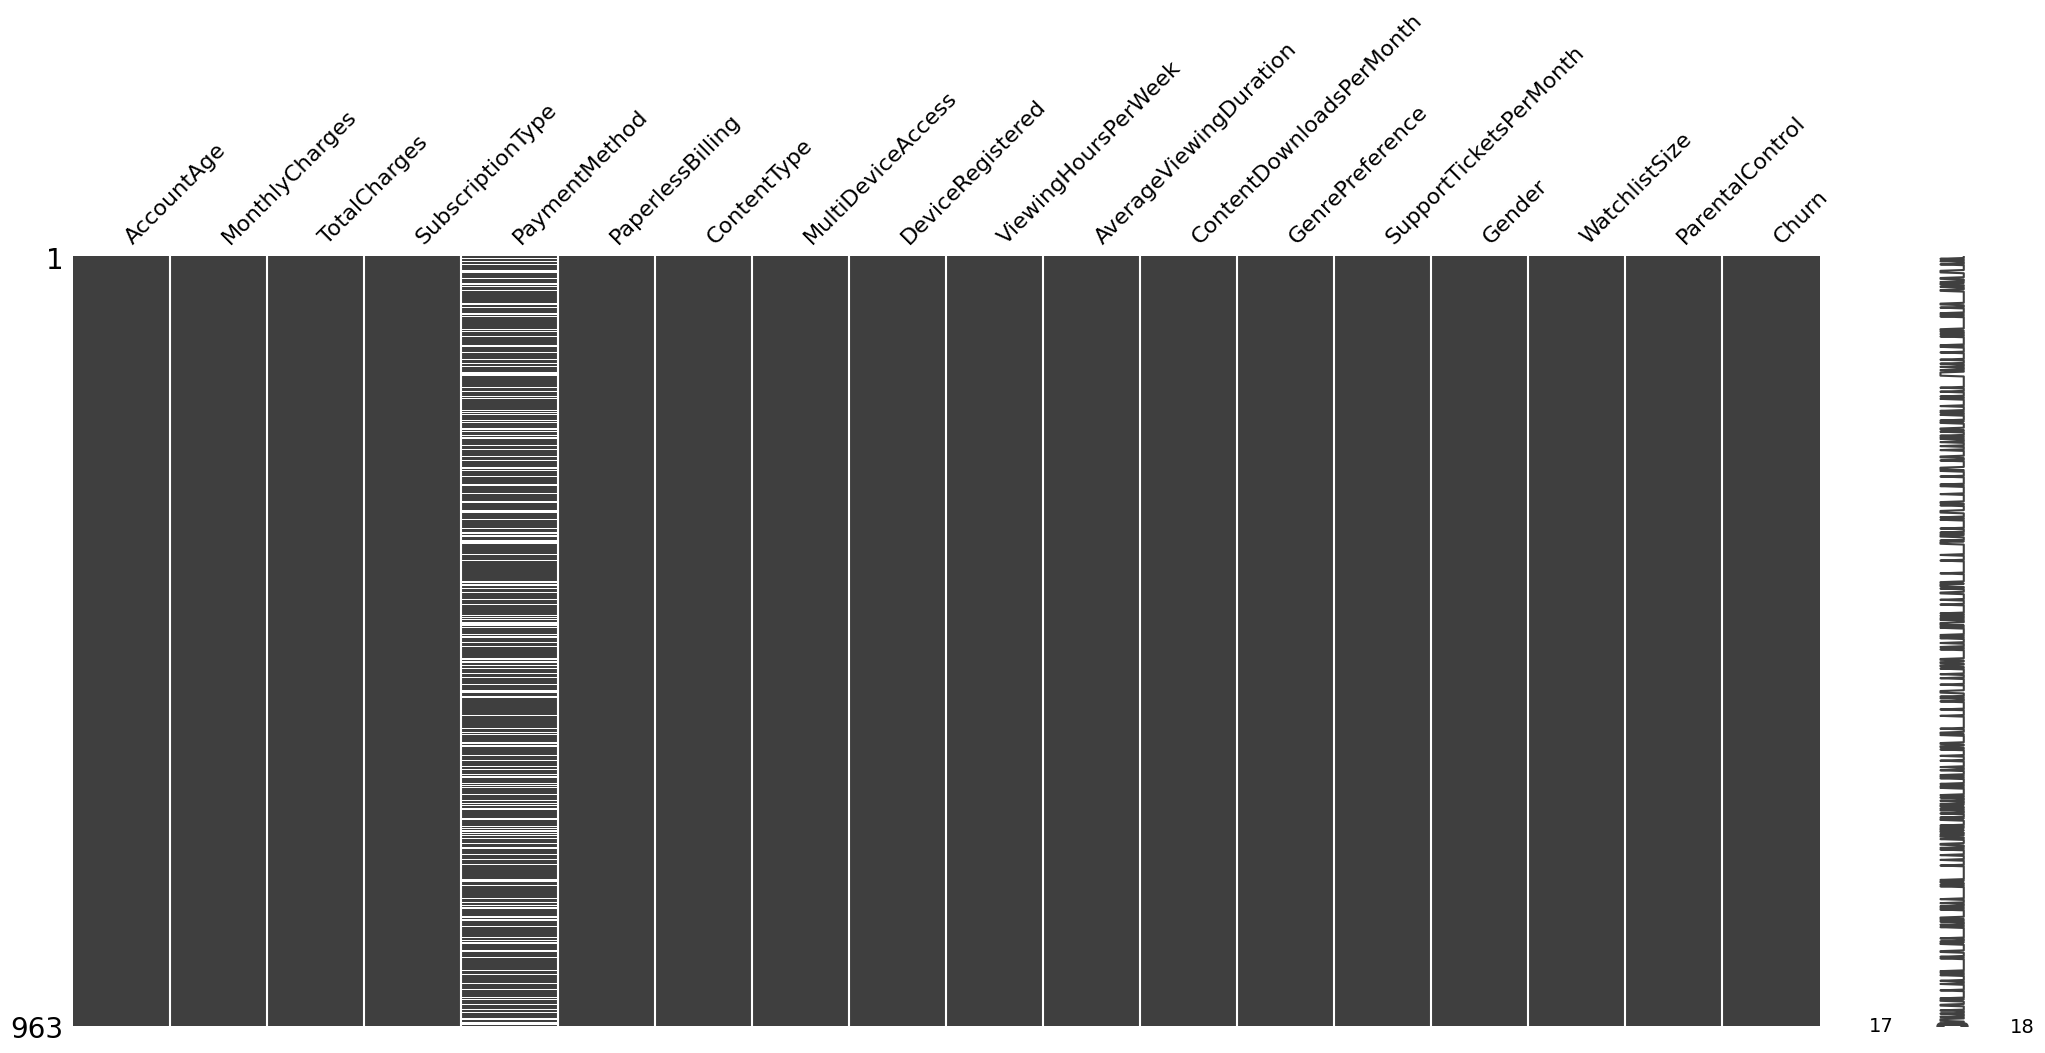

In [25]:
# Visualizamos los valores faltantes como una matriz
msno.matrix(df)

In [26]:
#Guardamos el dataframe limpio en un nuevo archivo CSV
df.to_csv(r'C:\Users\LENOVO\Documents\GitHub\ML_PowerBI\data\raw\df_imp.csv', index=False)

In [27]:
df.isnull().sum()

AccountAge                    0
MonthlyCharges                0
TotalCharges                  0
SubscriptionType              0
PaymentMethod               223
PaperlessBilling              0
ContentType                   0
MultiDeviceAccess             0
DeviceRegistered              0
ViewingHoursPerWeek           0
AverageViewingDuration        0
ContentDownloadsPerMonth      0
GenrePreference               0
SupportTicketsPerMonth        0
Gender                        0
WatchlistSize                 0
ParentalControl               0
Churn                         0
dtype: int64

In [28]:
df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,SupportTicketsPerMonth,WatchlistSize,Churn
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,57.515057,12.317386,715.122348,21.029241,90.741877,24.694704,4.455867,11.900312,0.175493
std,33.662575,3.927830,481.155303,11.318164,49.923719,14.319572,2.935706,7.117402,0.380586
min,1.000000,5.062339,11.582882,0.315317,5.028412,0.000000,0.000000,0.000000,0.000000
25%,29.000000,9.287640,348.815126,11.621961,47.777701,13.000000,2.000000,6.000000,0.000000
50%,55.000000,12.287810,649.842384,21.334100,89.878241,25.000000,5.000000,12.000000,0.000000
75%,86.000000,15.330919,994.499030,30.419851,134.353824,37.000000,7.000000,18.000000,0.000000
max,119.000000,19.932542,2261.019201,39.949086,179.752024,49.000000,9.000000,24.000000,1.000000


### 2. Partición de datos 

In [29]:
# Separamos variables del objetivo (churn)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Partición train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### 2.1 Imputación de la variable PaymentMethod a partir de otras variables con RF

In [30]:
#Selección de filas con y sin PaymentMethod en train
train_payment_complete = X_train[X_train['PaymentMethod'].notna()]
X_train_missing = X_train[X_train['PaymentMethod'].isna()]


In [31]:
#Selección de variables relacionadas
features_num = ['MonthlyCharges', 'TotalCharges', 'AccountAge']

# Entrenar RF solo con filas completas de train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_payment_complete[features_num], train_payment_complete['PaymentMethod'])

# Predecir PaymentMethod en train (solo filas con NaN)
preds_train = pd.Series(
    rf.predict(X_train_missing[features_num]),
    index=X_train_missing.index
)
X_train.loc[X_train_missing.index, 'PaymentMethod'] = preds_train

# Imputar PaymentMethod en test usando modelo entrenado en train
X_test_missing = X_test[X_test['PaymentMethod'].isna()]
preds_test = pd.Series(
    rf.predict(X_test_missing[features_num]),
    index=X_test_missing.index
)
X_test.loc[X_test_missing.index, 'PaymentMethod'] = preds_test


In [32]:
# Verificación
print("Train PaymentMethod:")
print(X_train['PaymentMethod'].value_counts())
print("\nTest PaymentMethod:")
print(X_test['PaymentMethod'].value_counts())

Train PaymentMethod:
PaymentMethod
Credit card         265
Electronic check    225
Bank transfer       224
Mailed check         56
Name: count, dtype: int64

Test PaymentMethod:
PaymentMethod
Credit card         66
Electronic check    57
Bank transfer       56
Mailed check        14
Name: count, dtype: int64


### 2.2 One Hot Encoding para las variables categóricas

In [33]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

In [35]:
# Crear el encoder
ohe = OneHotEncoder(
    drop='first',              # elimina 1 categoría por dummy trap
    handle_unknown='ignore',   # categorías nuevas en test -> columnas en 0
    sparse_output=False        # matriz densa
)

# Ajustar SOLO con train
X_train_encoded = ohe.fit_transform(X_train[categorical_cols])

# Transformar test usando el mismo encoder
X_test_encoded  = ohe.transform(X_test[categorical_cols])

In [37]:
# Crear DataFrame con las categorías codificadas
X_train_encoded_df = pd.DataFrame(
    X_train_encoded,
    index=X_train.index,
    columns=ohe.get_feature_names_out(categorical_cols)
)


In [42]:
# Crear DataFrame con las categorías codificadas
X_test_encoded_df = pd.DataFrame(
    X_test_encoded,         
    index=X_test.index,      
    columns=ohe.get_feature_names_out(categorical_cols)
)

In [39]:
X_train_encoded_df.columns

Index(['SubscriptionType_Premium', 'SubscriptionType_Standard',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'PaperlessBilling_Yes',
       'ContentType_Movies', 'ContentType_TV Shows', 'MultiDeviceAccess_Yes',
       'DeviceRegistered_Mobile', 'DeviceRegistered_TV',
       'DeviceRegistered_Tablet', 'GenrePreference_Comedy',
       'GenrePreference_Drama', 'GenrePreference_Fantasy',
       'GenrePreference_Sci-Fi', 'Gender_Male', 'ParentalControl_Yes'],
      dtype='object')

In [40]:
X_train_encoded_df.shape

(770, 18)

In [43]:
X_test_encoded_df.shape

(193, 18)

In [45]:
numerical_cols = X_train.select_dtypes(include=['float', 'int']).columns
print(numerical_cols)

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth',
       'SupportTicketsPerMonth', 'WatchlistSize'],
      dtype='object')


#### Concatenamos de nuevo al Train y al Test el resto de variables numéricas

In [ ]:
#concatenación de las variables numéricas y categóricas codificadas en Train y en Test
X_train_final = pd.concat([X_train[numerical_cols], X_train_encoded_df], axis=1)
X_test_final  = pd.concat([X_test[numerical_cols],  X_test_encoded_df], axis=1)

In [47]:
X_train_final.shape

(770, 26)

In [48]:
X_test_final.shape

(193, 26)

### 2.3 Matriz de correlación

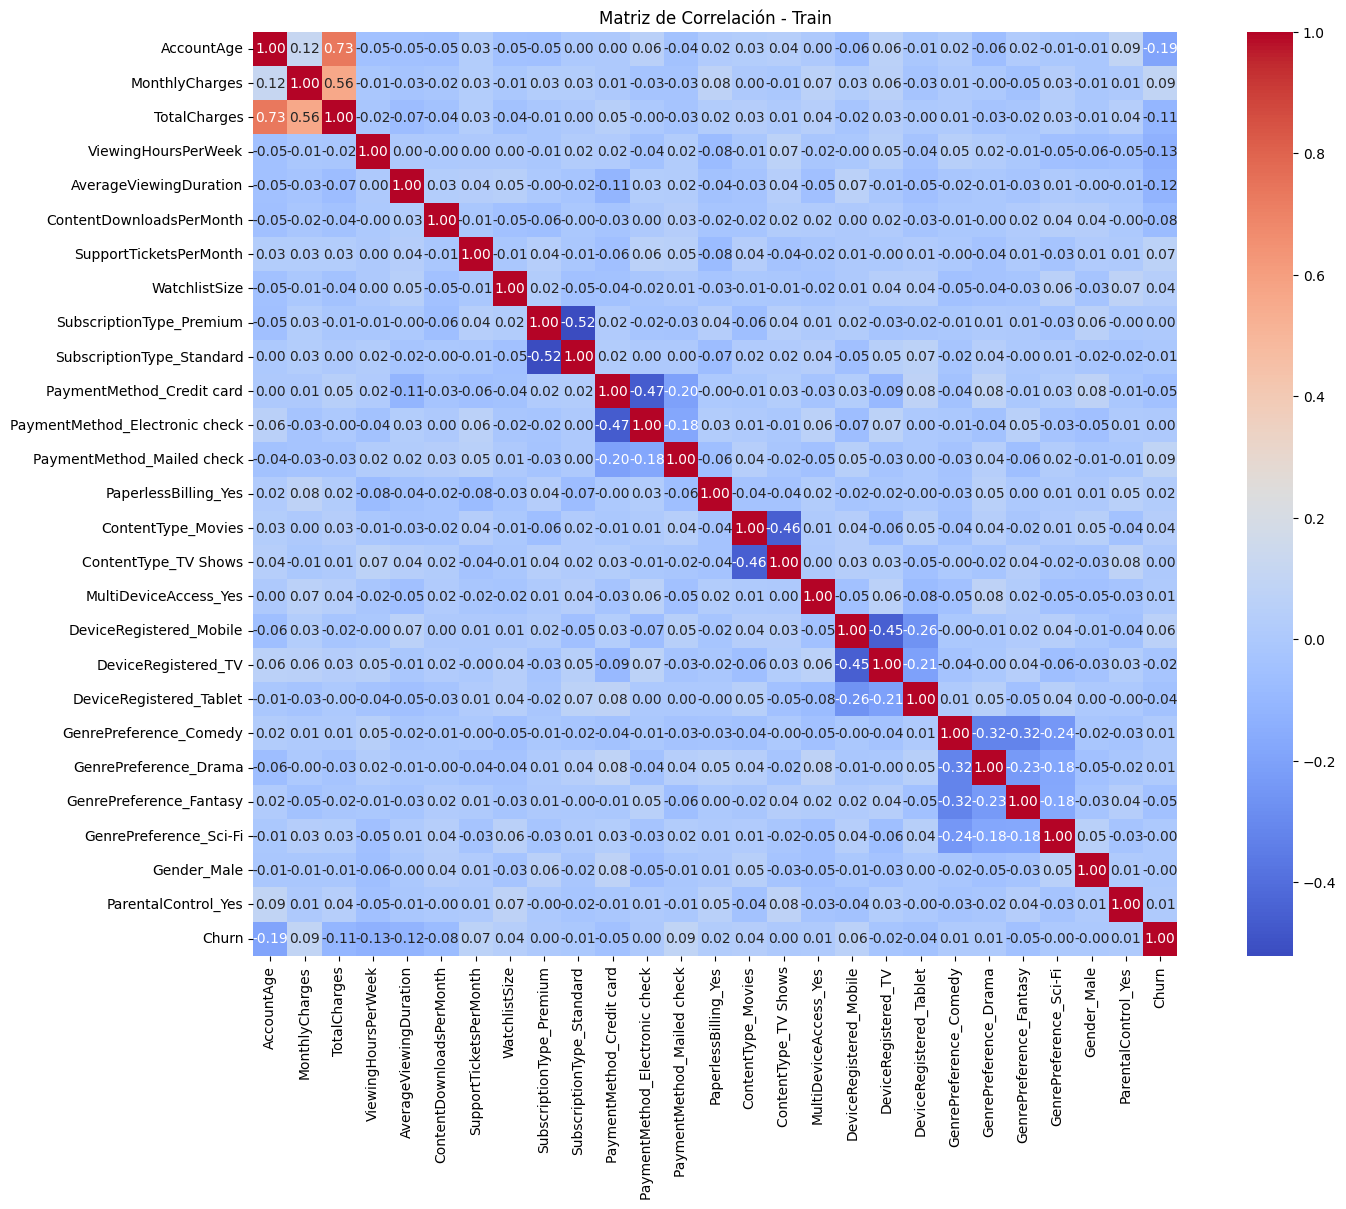

In [52]:
# Copiamos X_train y añadimos el target
train_corr = X_train_final.copy()
train_corr['Churn'] = y_train

# Calcular correlación
corr_matrix = train_corr.corr()


plt.figure(figsize=(18,12))

# Heatmap con anotaciones
sns.heatmap(
    corr_matrix,
    annot=True,            
    fmt=".2f",            
    cmap='coolwarm',       
    cbar=True,             
    square=True
)

plt.title("Matriz de Correlación - Train")
plt.show()

### 2.4 Escalado de variables numéricas para entrenar (StandardScaler)

In [56]:
# Columnas numéricas
numerical_cols = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 
                  'ViewingHoursPerWeek', 'AverageViewingDuration', 
                  'ContentDownloadsPerMonth', 'SupportTicketsPerMonth',
                  'WatchlistSize']

scaler = StandardScaler()

# Escalar train y test
X_train_final[numerical_cols] = scaler.fit_transform(X_train_final[numerical_cols])
X_test_final[numerical_cols]  = scaler.transform(X_test_final[numerical_cols])

In [60]:
#Entrenamiento con Regresión Logística
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_final, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#### **Comentario:** En este caso no tomamos el desbalance de clases, casi un 70-30 y nuestra variable objetico es Churn = 1 (aquellos que se desuscriben del servicio).

In [61]:
#Predicciones en test
y_pred = clf.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8134715025906736

Confusion Matrix:
 [[151   2]
 [ 34   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.89       153
           1       0.75      0.15      0.25        40

    accuracy                           0.81       193
   macro avg       0.78      0.57      0.57       193
weighted avg       0.80      0.81      0.76       193



#### **Comentario:** El modelo tiene buen nivel de Accuracy pero el nivel de recall en la condición de 'Churn' que nos interesa (activo = 1) es extremadamente bajo. Queremos evitar a toda costa los falsos negativos para poder detectar clientes que quieren desuscribirse o tienen intenciones y poder mantener el servicio.

In [62]:
# Crear DataFrame de coeficientes
coef_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Coefficient': clf.coef_[0],
    'Odds_Ratio': np.exp(clf.coef_[0])
}).sort_values(by='Odds_Ratio', ascending=False)

print(coef_df)

                           Feature  Coefficient  Odds_Ratio
12      PaymentMethod_Mailed check     0.663604    1.941779
14              ContentType_Movies     0.362136    1.436394
1                   MonthlyCharges     0.357241    1.429380
15            ContentType_TV Shows     0.346233    1.413732
6           SupportTicketsPerMonth     0.214064    1.238702
17         DeviceRegistered_Mobile     0.170843    1.186305
7                    WatchlistSize     0.125054    1.133210
25             ParentalControl_Yes     0.099316    1.104416
13            PaperlessBilling_Yes     0.066025    1.068253
11  PaymentMethod_Electronic check     0.063799    1.065879
20          GenrePreference_Comedy     0.011772    1.011842
16           MultiDeviceAccess_Yes     0.001478    1.001479
21           GenrePreference_Drama    -0.001873    0.998129
18             DeviceRegistered_TV    -0.009510    0.990535
24                     Gender_Male    -0.068201    0.934072
23          GenrePreference_Sci-Fi    -0

In [64]:
coef_df.head(10)

,Feature,Coefficient,Odds_Ratio
12,PaymentMethod_Mailed check,0.663604,1.941779
14,ContentType_Movies,0.362136,1.436394
1,MonthlyCharges,0.357241,1.429380
15,ContentType_TV Shows,0.346233,1.413732
6,SupportTicketsPerMonth,0.214064,1.238702
17,DeviceRegistered_Mobile,0.170843,1.186305
7,WatchlistSize,0.125054,1.133210
25,ParentalControl_Yes,0.099316,1.104416
13,PaperlessBilling_Yes,0.066025,1.068253
11,PaymentMethod_Electronic check,0.063799,1.065879


### 3. Cross-validation y SHAP

In [65]:
#Selección del modelo
clf = LogisticRegression(max_iter=1000, random_state=42)

# CV con 5 folds, evaluando recall (detectar churners)
cv_recall = cross_val_score(clf, X_train_final, y_train, cv=5, scoring='recall')
print("Recall promedio CV:", cv_recall.mean())
print("Recall CV por fold:", cv_recall)

#Entrenamiento final en train

clf.fit(X_train_final, y_train)

# Predicciones en test
y_pred = clf.predict(X_test_final)


Recall promedio CV: 0.10092307692307693
Recall CV por fold: [0.15384615 0.15384615 0.         0.07692308 0.12      ]


In [66]:
print("Accuracy test:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Active','Churn']))

Accuracy test: 0.8134715025906736

Confusion Matrix:
 [[151   2]
 [ 34   6]]

Classification Report:
               precision    recall  f1-score   support

      Active       0.82      0.99      0.89       153
       Churn       0.75      0.15      0.25        40

    accuracy                           0.81       193
   macro avg       0.78      0.57      0.57       193
weighted avg       0.80      0.81      0.76       193



### 4. **SMOTE** - BALANCEO DE CLASES

In [70]:
# Definir SMOTE
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # 1.0 = balance perfecto

# Aplicar SMOTE solo en train
X_train_res, y_train_res = smote.fit_resample(X_train_final, y_train)

# Revisamos el nuevo balance
print("Distribución de clases después de SMOTE:")
print(y_train_res.value_counts())

Distribución de clases después de SMOTE:
Churn
1    641
0    641
Name: count, dtype: int64


In [71]:
# Modelado con datos balanceados
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_res, y_train_res)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [72]:
#Preddicción sin SMOTE (ojo!)
y_pred = clf.predict(X_test_final)

print("Accuracy test:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Active','Churn']))

Accuracy test: 0.7098445595854922

Confusion Matrix:
 [[106  47]
 [  9  31]]

Classification Report:
               precision    recall  f1-score   support

      Active       0.92      0.69      0.79       153
       Churn       0.40      0.78      0.53        40

    accuracy                           0.71       193
   macro avg       0.66      0.73      0.66       193
weighted avg       0.81      0.71      0.74       193

